In [1]:
import numpy as np
import numpy
from PIL import Image
import pathlib
import sklearn
from matplotlib import pyplot as plt
from sklearn.metrics import *
from sklearn.preprocessing import *
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import *
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

2024-05-23 20:53:33.353177: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-23 20:53:34.235731: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.8/lib64
2024-05-23 20:53:34.235874: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.8/lib64
2024-05-23 20:53:34.235885: W tensorflow/compiler/tf2tensorrt/utils/py_utils

In [2]:
train_data_dir = "./preprocessed_data/"

image_size = (224, 224)
batch_size = 128

train = image_dataset_from_directory(
    train_data_dir,
    validation_split=0.2,
    seed=1,
    subset ="training",
    batch_size=batch_size,
    label_mode="categorical",
    shuffle=True,
    image_size=image_size
)

validation_dataset = image_dataset_from_directory(
    train_data_dir,
    validation_split=0.2,
    seed=1,
    subset ="validation",
    batch_size=batch_size,
    label_mode="categorical",
    image_size=image_size
)

Found 22169 files belonging to 41 classes.
Using 17736 files for training.


2024-05-23 20:53:38.560222: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-23 20:53:38.611618: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-23 20:53:38.611984: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-23 20:53:38.613147: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, 

Found 22169 files belonging to 41 classes.
Using 4433 files for validation.


In [3]:
import tensorflow_hub as hub
output_shape = 41
input_size = (224, 224, 3)
model_url = "https://kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/1"

model = Sequential([
    InputLayer(input_shape=input_size),
    hub.KerasLayer(model_url),
    Dense(units=output_shape, activation='softmax')
])

lr = 1e-3

model.compile(
        optimizer=Adam(learning_rate=lr),
        loss=CategoricalCrossentropy(),
        metrics=["accuracy"]
)

model.build((batch_size, ) + input_size)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 41)                41082     
                                                                 
Total params: 5,473,795
Trainable params: 41,082
Non-trainable params: 5,432,713
_________________________________________________________________


In [5]:
trained_model = model.fit(
    (train),
    validation_data=(validation_dataset),
    epochs = 10)

Epoch 1/10


2024-05-23 20:54:28.741640: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8901


  1/139 [..............................] - ETA: 14:17 - loss: 4.7203 - accuracy: 0.0312

2024-05-23 20:54:31.003234: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


139/139 [==============================] - 40s 243ms/step - loss: 2.0149 - accuracy: 0.4459 - val_loss: 1.6684 - val_accuracy: 0.5292
Epoch 2/10
139/139 [==============================] - 29s 208ms/step - loss: 1.5436 - accuracy: 0.5457 - val_loss: 1.5409 - val_accuracy: 0.5671
Epoch 3/10
139/139 [==============================] - 19s 139ms/step - loss: 1.4252 - accuracy: 0.5766 - val_loss: 1.5033 - val_accuracy: 0.5678
Epoch 4/10
139/139 [==============================] - 19s 137ms/step - loss: 1.3616 - accuracy: 0.5911 - val_loss: 1.4841 - val_accuracy: 0.5723
Epoch 5/10
139/139 [==============================] - 19s 136ms/step - loss: 1.3117 - accuracy: 0.6032 - val_loss: 1.4796 - val_accuracy: 0.5737
Epoch 6/10
139/139 [==============================] - 19s 136ms/step - loss: 1.2801 - accuracy: 0.6131 - val_loss: 1.4297 - val_accuracy: 0.5919
Epoch 7/10
139/139 [==============================] - 19s 133ms/step - loss: 1.2479 - accuracy: 0.6222 - val_loss: 1.4201 - val_accuracy: 0.5

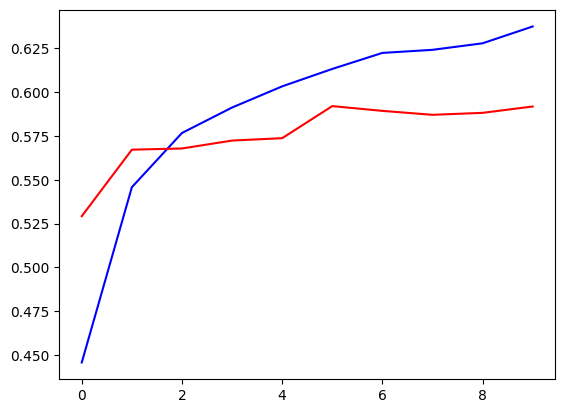

In [6]:
plt.plot(range(10), trained_model.history['accuracy' ], 'blue') 
plt.plot(range(10), trained_model.history['val_accuracy'], 'red')